In [53]:
# Install required packages.
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# Read the High-Frequency Trading Data
import pandas as pd
df = pd.read_csv('A.csv')
df.head()

,Time,Open,High,Low,Close,Volume,Amount,Open Interest
0,2013-09-17 08:59:00.005004,1.000000,1.000000,1.000000,1.000000,52.0,2355600.0,107122.0
1,2013-09-17 09:00:00.005000,1.000000,1.000662,0.998675,1.000442,1906.0,86308940.0,107682.0
2,2013-09-17 09:01:00.004997,1.000000,1.000662,0.999338,1.000442,382.0,17308420.0,107630.0
3,2013-09-17 09:02:00.005003,1.000442,1.000662,0.999779,1.000221,352.0,15948500.0,107564.0
4,2013-09-17 09:03:00.005000,1.000221,1.001545,1.000221,1.001104,490.0,22219480.0,107246.0


In [55]:
# Check the types of the dataframe column
df.dtypes

Time              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Amount           float64
Open Interest    float64
dtype: object

In [56]:
# Since time is object, it needs to be converted to datetime
df['Time'] = pd.to_datetime(df['Time'],format='mixed')
df.dtypes

Time             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                  float64
Amount                  float64
Open Interest           float64
dtype: object

In [57]:
# Check for missing values
df.isna().sum()

Time             0
Open             0
High             0
Low              0
Close            0
Volume           0
Amount           0
Open Interest    0
dtype: int64

In [58]:
# There is no missing values
# Create features from the 'Time' column
from fastai.tabular.core import add_datepart
add_datepart(df,'Time',drop=False)
df.head()

,Time,Open,High,Low,Close,Volume,Amount,Open Interest,TimeYear,TimeMonth,...,TimeDay,TimeDayofweek,TimeDayofyear,TimeIs_month_end,TimeIs_month_start,TimeIs_quarter_end,TimeIs_quarter_start,TimeIs_year_end,TimeIs_year_start,TimeElapsed
0,2013-09-17 08:59:00.005004,1.000000,1.000000,1.000000,1.000000,52.0,2355600.0,107122.0,2013,9,...,17,1,260,False,False,False,False,False,False,1.379408e+09
1,2013-09-17 09:00:00.005000,1.000000,1.000662,0.998675,1.000442,1906.0,86308940.0,107682.0,2013,9,...,17,1,260,False,False,False,False,False,False,1.379408e+09
2,2013-09-17 09:01:00.004997,1.000000,1.000662,0.999338,1.000442,382.0,17308420.0,107630.0,2013,9,...,17,1,260,False,False,False,False,False,False,1.379408e+09
3,2013-09-17 09:02:00.005003,1.000442,1.000662,0.999779,1.000221,352.0,15948500.0,107564.0,2013,9,...,17,1,260,False,False,False,False,False,False,1.379409e+09
4,2013-09-17 09:03:00.005000,1.000221,1.001545,1.000221,1.001104,490.0,22219480.0,107246.0,2013,9,...,17,1,260,False,False,False,False,False,False,1.379409e+09


In [59]:
# Check for missing values
df.isna().sum()

Time                    0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Amount                  0
Open Interest           0
TimeYear                0
TimeMonth               0
TimeWeek                0
TimeDay                 0
TimeDayofweek           0
TimeDayofyear           0
TimeIs_month_end        0
TimeIs_month_start      0
TimeIs_quarter_end      0
TimeIs_quarter_start    0
TimeIs_year_end         0
TimeIs_year_start       0
TimeElapsed             0
dtype: int64

In [60]:
# Set the column 'Time' to be the dataframe index
dg = df.set_index('Time')
dg.head()

,Open,High,Low,Close,Volume,Amount,Open Interest,TimeYear,TimeMonth,TimeWeek,TimeDay,TimeDayofweek,TimeDayofyear,TimeIs_month_end,TimeIs_month_start,TimeIs_quarter_end,TimeIs_quarter_start,TimeIs_year_end,TimeIs_year_start,TimeElapsed
Time,,,,,,,,,,,,,,,,,,,,
2013-09-17 08:59:00.005004,1.000000,1.000000,1.000000,1.000000,52.0,2355600.0,107122.0,2013,9,38,17,1,260,False,False,False,False,False,False,1.379408e+09
2013-09-17 09:00:00.005000,1.000000,1.000662,0.998675,1.000442,1906.0,86308940.0,107682.0,2013,9,38,17,1,260,False,False,False,False,False,False,1.379408e+09
2013-09-17 09:01:00.004997,1.000000,1.000662,0.999338,1.000442,382.0,17308420.0,107630.0,2013,9,38,17,1,260,False,False,False,False,False,False,1.379408e+09
2013-09-17 09:02:00.005003,1.000442,1.000662,0.999779,1.000221,352.0,15948500.0,107564.0,2013,9,38,17,1,260,False,False,False,False,False,False,1.379409e+09
2013-09-17 09:03:00.005000,1.000221,1.001545,1.000221,1.001104,490.0,22219480.0,107246.0,2013,9,38,17,1,260,False,False,False,False,False,False,1.379409e+09


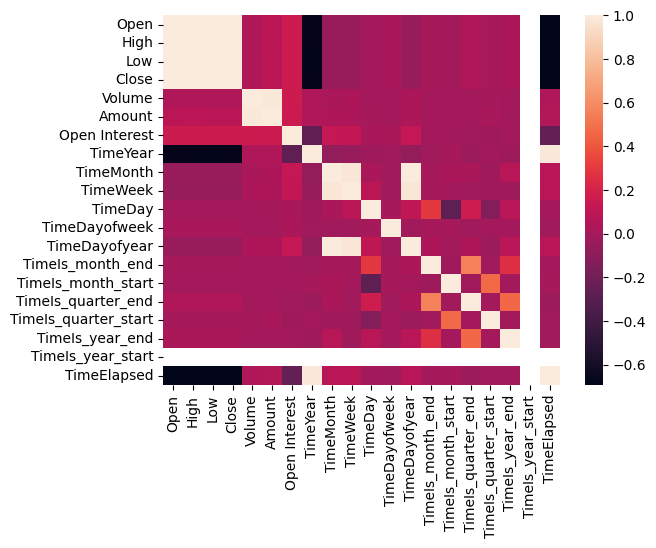

In [61]:
# Create correlation matrix using Pearson coefficient and display it in heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dg.corr())
plt.show()

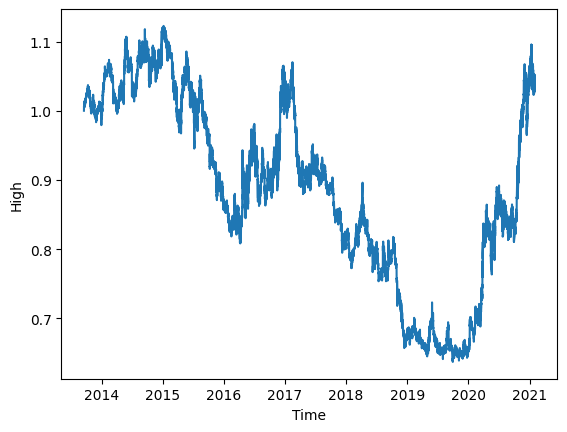

In [62]:
# Plot the the time series data of the column 'High'
sns.lineplot(df,x='Time',y='High')
plt.show()

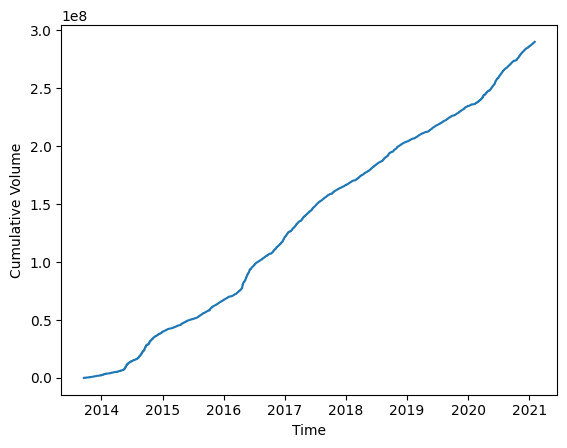

In [63]:
# Calculate cumulative trading volume and plot it
df['Cumulative Volume'] = df['Volume'].cumsum()
sns.lineplot(df,x='Time',y='Cumulative Volume')
plt.show()

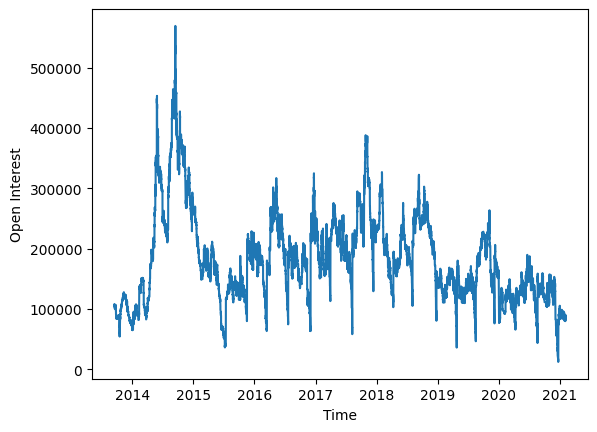

In [64]:
# Plot the the time series data of the column 'Open Interest'
sns.lineplot(df,x='Time',y='Open Interest')
plt.show()

In [65]:
from sklearn.ensemble import IsolationForest
# Find the anomalies using isolation forest
dg['anomaly'] = IsolationForest(random_state=0).fit_predict(dg) == -1
dg.head()

,Open,High,Low,Close,Volume,Amount,Open Interest,TimeYear,TimeMonth,TimeWeek,...,TimeDayofweek,TimeDayofyear,TimeIs_month_end,TimeIs_month_start,TimeIs_quarter_end,TimeIs_quarter_start,TimeIs_year_end,TimeIs_year_start,TimeElapsed,anomaly
Time,,,,,,,,,,,,,,,,,,,,,
2013-09-17 08:59:00.005004,1.000000,1.000000,1.000000,1.000000,52.0,2355600.0,107122.0,2013,9,38,...,1,260,False,False,False,False,False,False,1.379408e+09,False
2013-09-17 09:00:00.005000,1.000000,1.000662,0.998675,1.000442,1906.0,86308940.0,107682.0,2013,9,38,...,1,260,False,False,False,False,False,False,1.379408e+09,True
2013-09-17 09:01:00.004997,1.000000,1.000662,0.999338,1.000442,382.0,17308420.0,107630.0,2013,9,38,...,1,260,False,False,False,False,False,False,1.379408e+09,False
2013-09-17 09:02:00.005003,1.000442,1.000662,0.999779,1.000221,352.0,15948500.0,107564.0,2013,9,38,...,1,260,False,False,False,False,False,False,1.379409e+09,False
2013-09-17 09:03:00.005000,1.000221,1.001545,1.000221,1.001104,490.0,22219480.0,107246.0,2013,9,38,...,1,260,False,False,False,False,False,False,1.379409e+09,False


In [66]:
len(dg[dg['anomaly']])/len(dg)*100

19.441034716778983

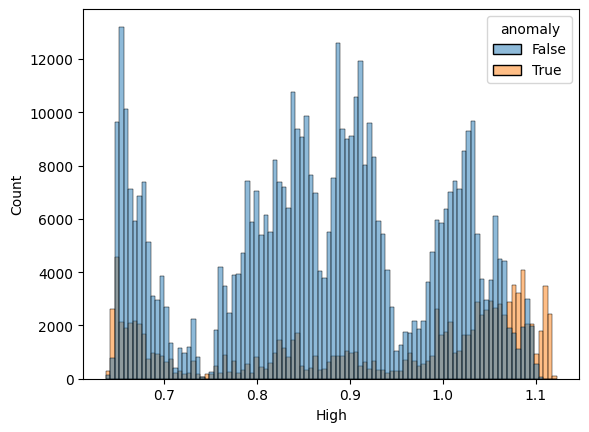

In [67]:
# Plot the effect of anomaly on the high price
sns.histplot(data=dg,x='High',hue='anomaly')
plt.show()

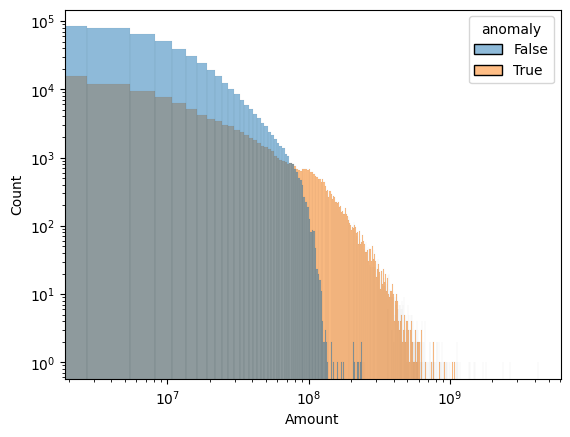

In [68]:
# Plot the correlation between the anomaly and the trading amount
sns.histplot(data=dg,x='Amount',hue='anomaly')
plt.xscale('log')
plt.yscale('log')
plt.show()

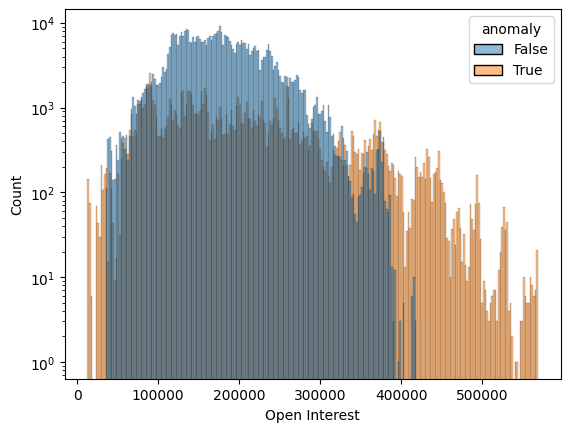

In [69]:
# Plot the correlation between the anomaly and the open interest
sns.histplot(data=dg,x='Open Interest',hue='anomaly')
plt.yscale('log')
plt.show()